In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import concurrent.futures

C:\Users\afidz\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Titanic Passenger Dataset Analysis

The Titanic Passenger dataset provides information about passengers who were aboard the RMS Titanic during its ill-fated maiden voyage. This dataset is often used for exploring patterns and factors associated with survival on the Titanic.

## Dataset Description

The dataset includes the following columns:

- **PassengerId**: Unique identifier for each passenger.
- **Survived**: Survival status of the passenger (0 = Not Survived, 1 = Survived).
- **Pclass**: Passenger class (1 = First class, 2 = Second class, 3 = Third class).
- **Sex**: Gender of the passenger.
- **Age**: Age of the passenger.
- **SibSp**: Number of siblings/spouses aboard the Titanic.
- **Parch**: Number of parents/children aboard the Titanic.
- **Fare**: Fare paid by the passenger.
- **Embarked**: Port of embarkation:
  - **1** = Cherbourg
  - **2** = Queenstown
  - **3** = Southampton


In [2]:
df = pd.read_csv('dataset/SVMtrain.csv')

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3
5,6,0,3,Male,60.0,0,0,8.4583,2
6,7,0,1,Male,54.0,0,0,51.8625,3
7,8,0,3,Male,2.0,3,1,21.0750,3
8,9,1,3,female,27.0,0,2,11.1333,3
9,10,1,2,female,14.0,1,0,30.0708,1


In [4]:
df.tail(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
879,882,0,3,Male,33.0,0,0,7.8958,3
880,883,0,3,female,22.0,0,0,10.5167,3
881,884,0,2,Male,28.0,0,0,10.5000,3
882,885,0,3,Male,25.0,0,0,7.0500,3
883,886,0,3,female,39.0,0,5,29.1250,2
884,887,0,2,Male,27.0,0,0,13.0000,3
885,888,1,1,female,19.0,0,0,30.0000,3
886,889,0,3,female,60.0,1,2,23.4500,3
887,890,1,1,Male,26.0,0,0,30.0000,1
888,891,0,3,Male,32.0,0,0,7.7500,2


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

# Exploratory Data Analysis (EDA)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,35.686355,0.524184,0.382452,32.096681,2.535433
std,256.998173,0.486260,0.834700,17.756733,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,2.000000
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200,3.000000
75%,668.000000,1.000000,3.000000,54.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [8]:
df.shape

(889, 9)

In [9]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

In [10]:
missing_values = df.isna()

# Cek jumlah missing data setiap kolom
missing_values_count = missing_values.sum()
print(missing_values_count)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


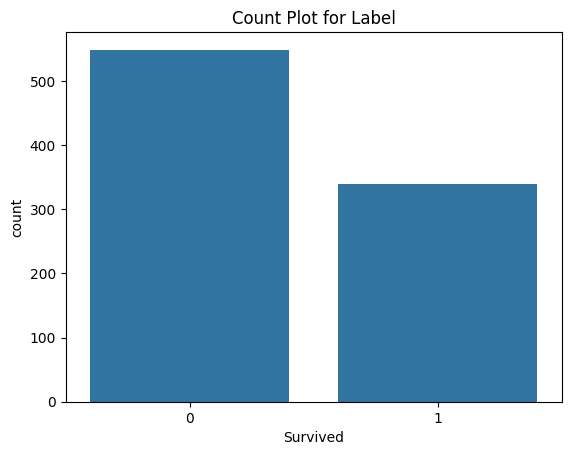

In [11]:
sns.countplot(x=df.Survived)
plt.title('Count Plot for Label')
plt.show()

In [12]:
df["Survived"].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

### Cek passengers yang survived per class

In [13]:
survived_data = df[df['Survived'] == 1]
total_counts = df.shape[0]
total_entries_survived = survived_data.shape[0]

print("Total Passengers")
print(total_counts)
print(" ")
print("Survivors")
print(total_entries_survived)

Total Passengers
889
 
Survivors
340


In [14]:
survived_data = df[df['Survived'] == 2]
total_counts = df.shape[0]
total_entries_survived = survived_data.shape[0]

print("Total Passengers")
print(total_counts)
print(" ")
print("Survivors")
print(total_entries_survived)

Total Passengers
889
 
Survivors
0


In [15]:
survived_data = df[df['Survived'] == 3]
total_counts = df.shape[0]
total_entries_survived = survived_data.shape[0]

print("Total Passengers")
print(total_counts)
print(" ")
print("Survivors")
print(total_entries_survived)

Total Passengers
889
 
Survivors
0


In [16]:
survival_rate = df['Survived'].value_counts(normalize=True) * 100
print("\nSurvival Rate:\n", survival_rate)


Survival Rate:
 Survived
0    61.754781
1    38.245219
Name: proportion, dtype: float64



Survival by Passenger Class:
 Pclass
1    62.616822
2    47.282609
3    24.236253
Name: Survived, dtype: float64


C:\Users\afidz\AppData\Local\Temp\ipykernel_42844\661459821.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='Set2')


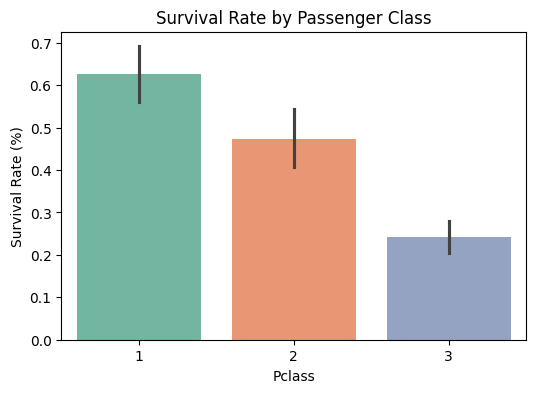

In [17]:
# Step 3: Survival by Passenger Class
pclass_survival = df.groupby('Pclass')['Survived'].mean() * 100
print("\nSurvival by Passenger Class:\n", pclass_survival)

# Plotting survival rate by class
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df, palette='Set2')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.show()

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [19]:
df.groupby(["Sex","Embarked","Pclass"]).agg({"Age":"mean","Survived":"mean"})

Age  Survived
Sex    Embarked Pclass                     
Male   1        1       42.952381  0.404762
                2       32.750000  0.200000
                3       39.660930  0.232558
       2        1       44.000000  0.000000
                2       57.000000  0.000000
                3       48.564103  0.076923
       3        1       45.334430  0.354430
                2       32.977629  0.154639
                3       33.007547  0.128302
female 1        1       38.837209  0.976744
                2       19.142857  1.000000
                3       28.043478  0.652174
       2        1       33.000000  1.000000
                2       45.000000  1.000000
                3       48.742424  0.727273
       3        1       34.979167  0.958333
                2       30.171642  0.910448
                3       28.238636  0.375000

### Passenger untuk PClass, Age dan Sex

C:\Users\afidz\AppData\Local\Temp\ipykernel_42844\2042765670.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survived_passengers_by_gender.index, y=survived_passengers_by_gender.values, palette=['blue', 'pink'], ax=ax[1])
C:\Users\afidz\AppData\Local\Temp\ipykernel_42844\2042765670.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survived_passengers_by_gender.index, y=survived_passengers_by_gender.values, palette=['blue', 'pink'], ax=ax[2])


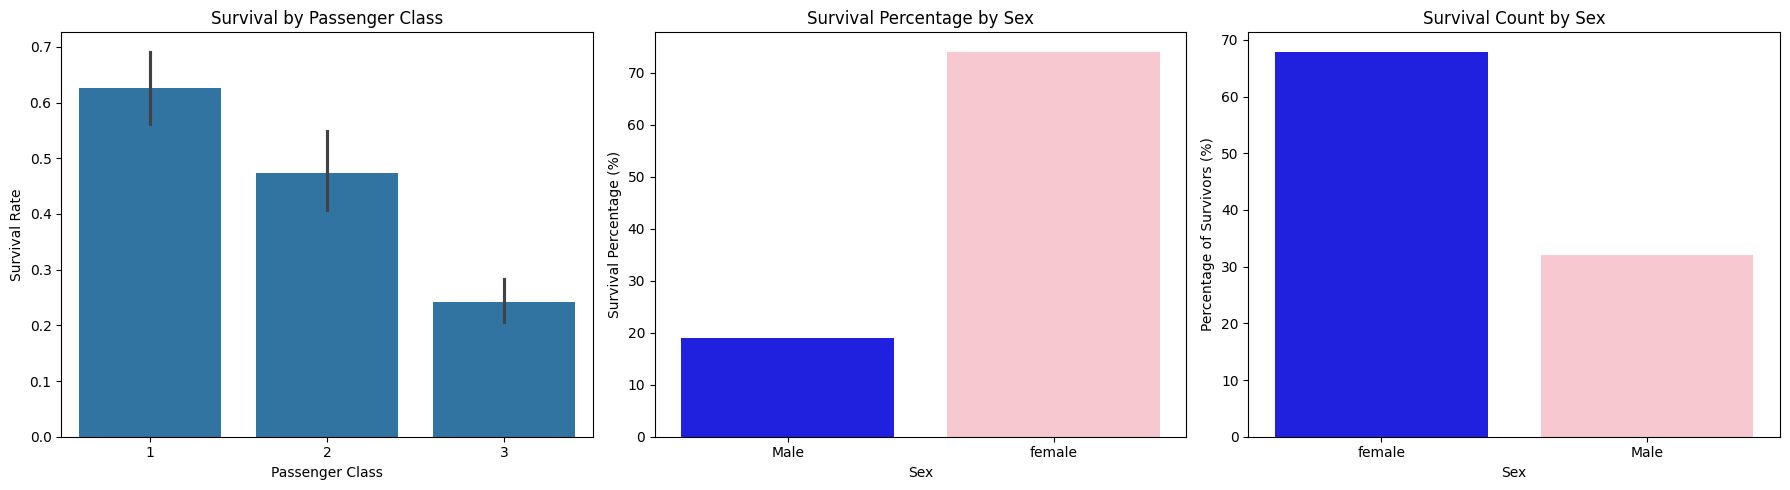

Survival by Passenger Class
Pclass 1: 134 (39.41%)
Pclass 2: 87 (25.59%)
Pclass 3: 119 (35.00%)


In [20]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Survival by Passenger Class
sns.barplot(data=df, x='Pclass', y='Survived', ax=ax[0])
ax[0].set_title("Survival by Passenger Class")
ax[0].set_xlabel('Passenger Class')
ax[0].set_ylabel('Survival Rate')

# Plot 2: Survival Percentage by Sex
survived_passengers_by_gender = df.groupby('Sex')['Survived'].mean() * 100
sns.barplot(x=survived_passengers_by_gender.index, y=survived_passengers_by_gender.values, palette=['blue', 'pink'], ax=ax[1])
ax[1].set_title("Survival Percentage by Sex")
ax[1].set_xlabel('Sex')
ax[1].set_ylabel('Survival Percentage (%)')

# Plot 3: Survival Count by Gender
survived_data = df[df['Survived'] == 1]
survived_passengers_by_gender = survived_data['Sex'].value_counts(normalize=True) * 100
sns.barplot(x=survived_passengers_by_gender.index, y=survived_passengers_by_gender.values, palette=['blue', 'pink'], ax=ax[2])
ax[2].set_title("Survival Count by Sex")
ax[2].set_xlabel('Sex')
ax[2].set_ylabel('Percentage of Survivors (%)')

# Adjust layout
plt.tight_layout()
plt.show()

# Display survival counts and percentages by Passenger Class
survived_data = df[df['Survived'] == 1]
pclass_counts = survived_data['Pclass'].value_counts().sort_index()

print("Survival by Passenger Class")
total_survivors = pclass_counts.sum()
for pclass, count in pclass_counts.items():
    percentage = (count / total_survivors) * 100
    print(f"Pclass {pclass}: {count} ({percentage:.2f}%)")

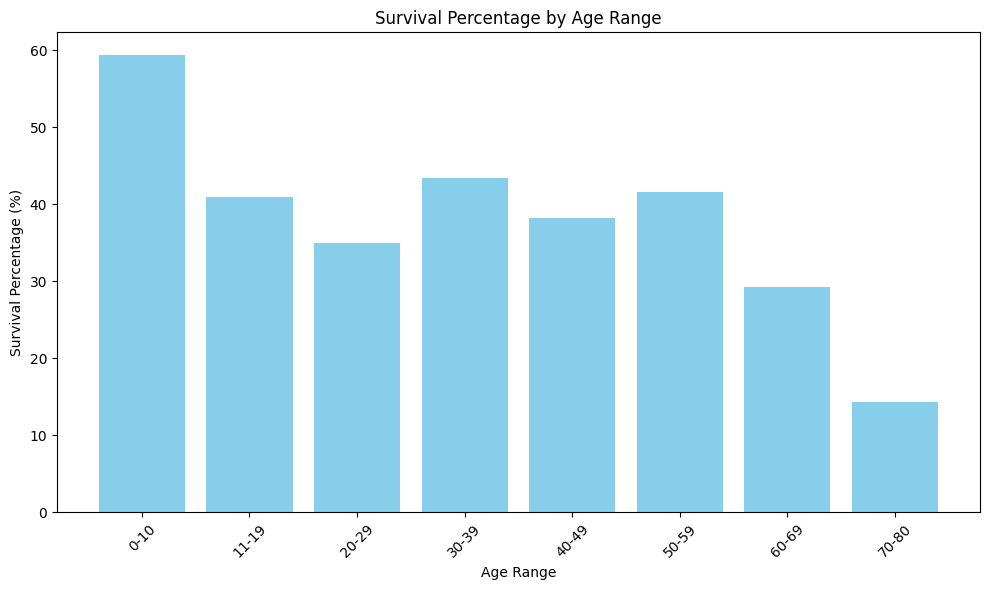

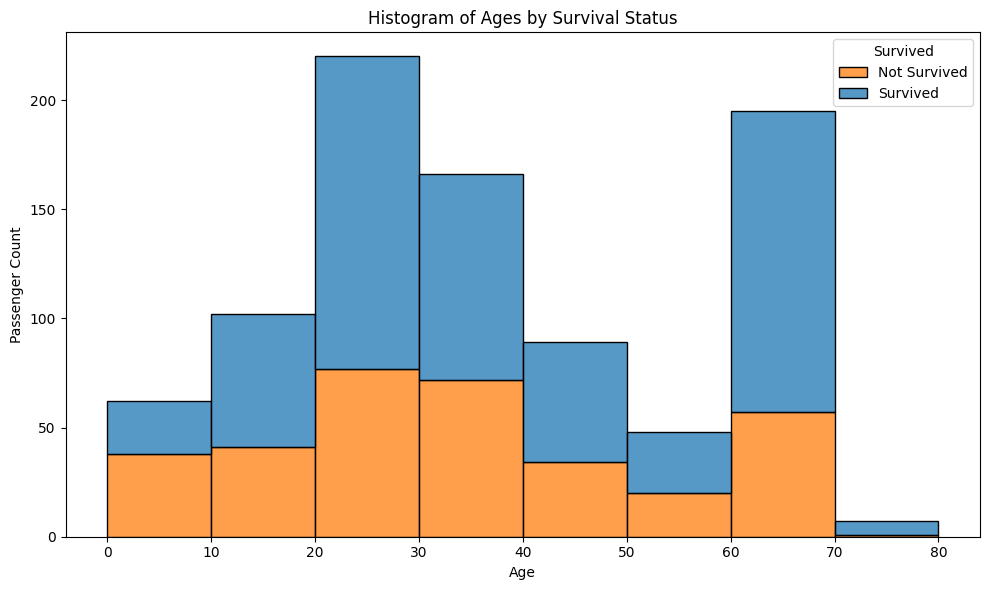

In [21]:
# Assuming titanic_data is your Titanic dataset
age_ranges = [(0, 10), (11, 19), (20, 29), (30, 39), (40, 49), (50, 59), (60, 69), (70, 80)]

# Calculate the survival percentages in each age range
survival_percentages = []
for age_range in age_ranges:
    age_start, age_end = age_range
    # Total passengers in age range
    passengers_in_range = df[(df['Age'] >= age_start) & (df['Age'] <= age_end)]
    # Survivors in age range
    survivors_in_range = passengers_in_range[passengers_in_range['Survived'] == 1]
    if passengers_in_range.shape[0] > 0:  # Avoid division by zero
        survival_percentage = (survivors_in_range.shape[0] / passengers_in_range.shape[0]) * 100
    else:
        survival_percentage = 0
    survival_percentages.append(survival_percentage)

# Create a bar chart to visualize the survival percentages by age range
plt.figure(figsize=(10, 6))
age_labels = [f'{age_start}-{age_end}' for age_start, age_end in age_ranges]
plt.bar(age_labels, survival_percentages, color='skyblue')
plt.xlabel('Age Range')
plt.ylabel('Survival Percentage (%)')
plt.title('Survival Percentage by Age Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Define age bins for histogram
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# Create a new column in the DataFrame to store age categories
# df['AgeCategory'] = pd.cut(df['Age'], bins=age_bins)

# Create the histogram with survival status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=age_bins, kde=False)
plt.xlabel('Age')
plt.ylabel('Passenger Count')
plt.title('Histogram of Ages by Survival Status')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.tight_layout()
plt.show()

### Plotting

In [22]:
def bar(col):
    # Fix the x argument and use lowercase 'x'
    ax = sns.countplot(data=df, hue=col, x="Survived")  
    total = len(df)
    
    # Loop over the patches (bars) to add percentage annotations
    for p in ax.patches:
        height = p.get_height()
        percent = (height / total) * 100 
        percentage = f'{percent:.1f}%'
        if percent >= 1.5:
            ax.annotate(percentage, 
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    # Fix xticks for better readability
    ax.set_xticklabels(['Dead', 'Survived'], rotation=0)
    
    plt.show()

In [23]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

C:\Users\afidz\AppData\Local\Temp\ipykernel_42844\80845261.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Dead', 'Survived'], rotation=0)


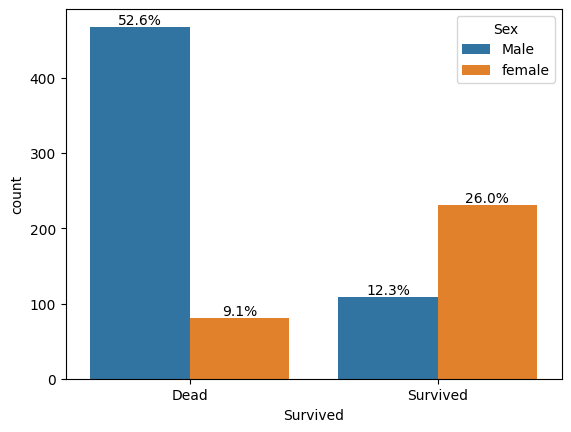

In [24]:
bar('Sex')

C:\Users\afidz\AppData\Local\Temp\ipykernel_42844\80845261.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Dead', 'Survived'], rotation=0)


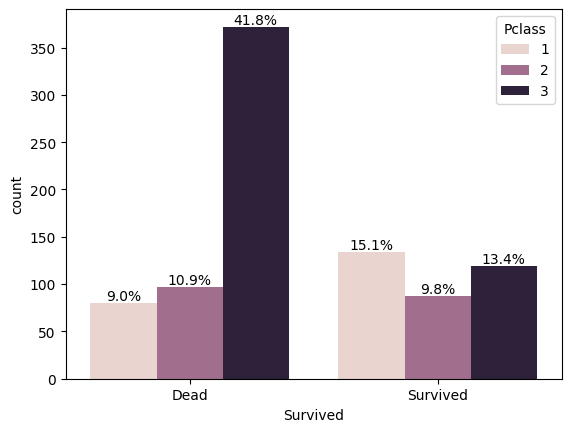

In [25]:
bar('Pclass')

C:\Users\afidz\AppData\Local\Temp\ipykernel_42844\80845261.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Dead', 'Survived'], rotation=0)


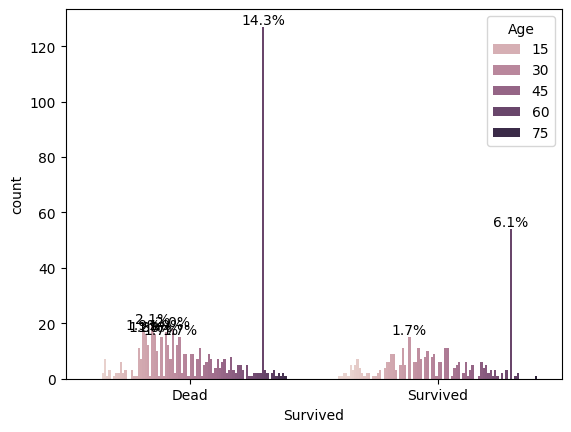

In [26]:
bar('Age')

C:\Users\afidz\AppData\Local\Temp\ipykernel_42844\80845261.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Dead', 'Survived'], rotation=0)


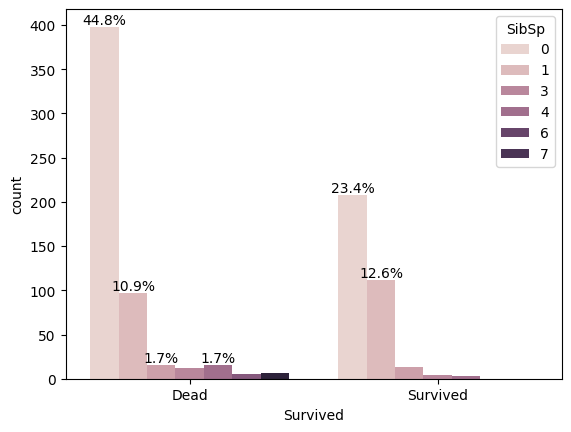

In [27]:
bar('SibSp')

C:\Users\afidz\AppData\Local\Temp\ipykernel_42844\80845261.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Dead', 'Survived'], rotation=0)


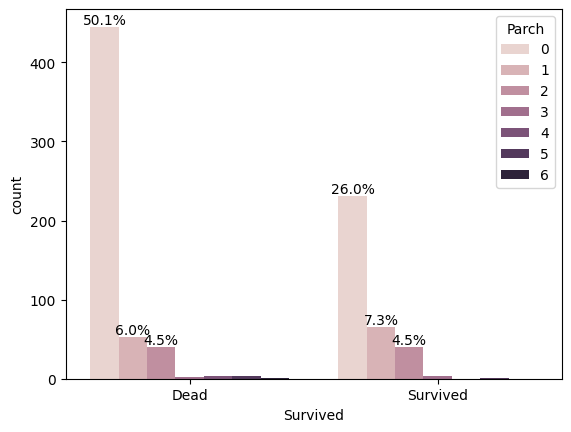

In [28]:
bar('Parch')

C:\Users\afidz\AppData\Local\Temp\ipykernel_42844\80845261.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Dead', 'Survived'], rotation=0)


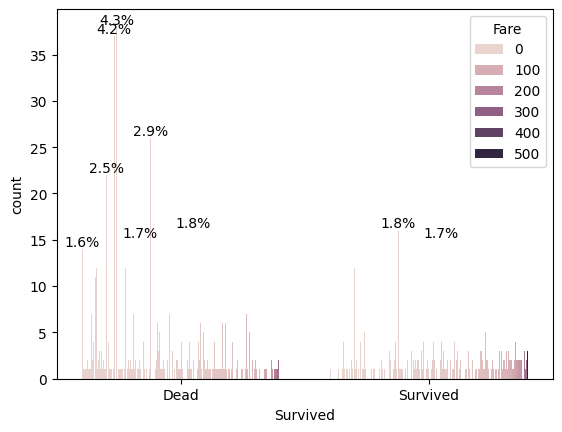

In [29]:
bar('Fare')

C:\Users\afidz\AppData\Local\Temp\ipykernel_42844\80845261.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Dead', 'Survived'], rotation=0)


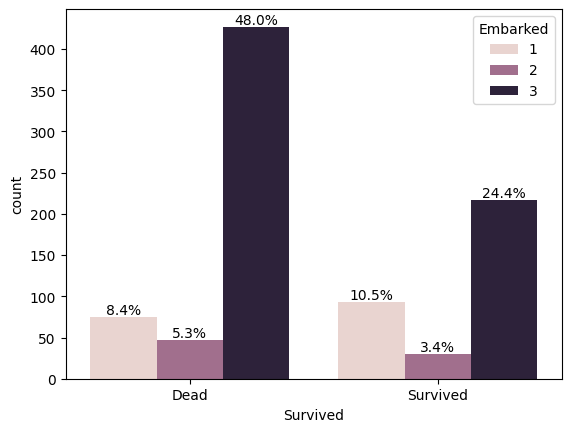

In [30]:
bar('Embarked')

In [31]:
df.Sex.value_counts()

Sex
Male      577
female    312
Name: count, dtype: int64

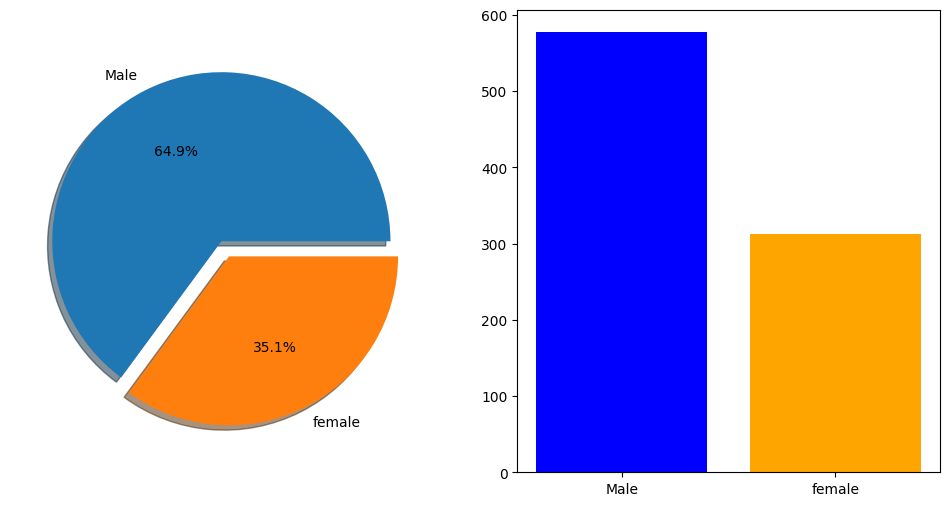

In [32]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(df.Sex.value_counts().values, 
        labels=df.Sex.value_counts().index, 
        shadow=True, 
        autopct='%1.1f%%', 
        explode=[0, 0.1])

plt.subplot(1, 2, 2)
plt.bar(df.Sex.value_counts().index, df.Sex.value_counts().values, color=['blue', 'orange'])

plt.show()

In [33]:
df.Pclass.value_counts()

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

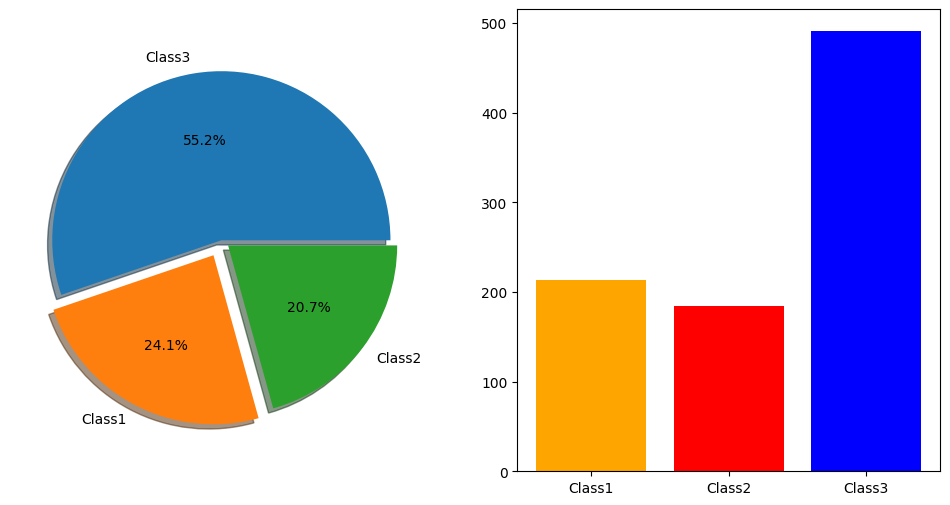

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(df.Pclass.value_counts().values, 
        labels=["Class3","Class1","Class2"], 
        shadow=True, 
        autopct='%1.1f%%', 
        explode=[0, 0.1,0.05])

plt.subplot(1, 2, 2)
plt.bar(df.Pclass.value_counts().index, df.Pclass.value_counts().values, color=['blue', 'orange',"red"])
plt.xticks([1,2,3],["Class1","Class2","Class3"])
plt.show()

In [35]:
df.Age.value_counts()

Age
60.00    181
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
0.92       1
23.50      1
55.50      1
74.00      1
Name: count, Length: 88, dtype: int64

In [36]:
# #link parch info with sex
# filtered_data = df[df['Parch'].between(1, 6)]

# # Create a countplot to visualize the distribution of Sex for each Parch value
# plt.figure(figsize=(10, 6))
# sns.countplot(data=df, x='Sex', hue='Parch', palette='RdYlBu')
# plt.xlabel('Sex')
# plt.ylabel('Dependent Count')
# plt.title('Distribution of Sex by Dependent Count (1-6)')
# plt.legend(title='Dependents')
# plt.xticks(rotation=0)
# plt.show()

# # Filter the data to include only rows where "Survived" = 1
# survived_data = df[df['Survived'] == 1]

# # Create a pivot table to count the number of passengers for each combination of Parch and Sex
# pivot_table = survived_data.pivot_table(index='Parch', columns='Sex', values='Survived', aggfunc='count')

# # Create a heatmap to visualize the counts of Survived by Parch and Sex
# plt.figure(figsize=(10, 6))
# sns.heatmap(data=pivot_table, annot=True, fmt='g', cmap='YlGnBu', cbar=True, linewidths=.5)
# plt.xlabel('Sex')
# plt.ylabel('Dependents')
# plt.title('Survival Distribution by Dependents and Sex')
# plt.show()

# Bagan pertama menganalisis faktor tanggungan anak di antara penumpang Titanic, mengelompokkan berdasarkan jenis kelamin dan jumlah tanggungan dari 0 hingga 6. Hasilnya menunjukkan adanya anak-anak dalam keluarga di kapal.

# Awalnya, distribusi penumpang tanpa tanggungan (0) seimbang antara laki-laki dan perempuan. Namun, setelah itu, terlihat bahwa wanita memiliki tanggungan lebih banyak, terutama satu anak atau lebih. Ini menunjukkan peran penting wanita sebagai pengasuh pada masa itu dan banyaknya keluarga, terutama ibu dan anak, di Titanic.

# Bagan kedua meneliti tingkat kelangsungan hidup penumpang, fokus pada yang memiliki tanggungan anak, juga berdasarkan jenis kelamin. Ditemukan bahwa penumpang perempuan memiliki tingkat kelangsungan hidup yang lebih tinggi dibandingkan laki-laki di semua kategori jumlah anak. Khususnya, tidak ada laki-laki dengan banyak tanggungan yang selamat, menunjukkan kesulitan yang dialami pria dengan keluarga besar.

# Meskipun penumpang tanpa tanggungan lebih banyak, ini tidak selalu berarti peluang bertahan hidup lebih tinggi. Wanita dengan satu anak menunjukkan tingkat kelangsungan hidup lebih dari 90%, meskipun jumlahnya lebih sedikit. Juga, tidak ada laki-laki dengan tiga atau lebih tanggungan yang selamat, dan hanya sedikit perempuan dalam kategori yang sama yang berhasil bertahan.

## Statistik Deskriptif:
- **Rata-rata usia**: 35,7 tahun (dengan rentang dari 0,42 hingga 80 tahun).
- **Rata-rata harga tiket**: $32,10 (dengan variasi yang signifikan, berkisar dari $0 hingga lebih dari $512).
- Sebagian besar penumpang berada di kelas ketiga, dengan ukuran keluarga rata-rata (SibSp + Parch) sedikit di atas 1.

## Tingkat Kelangsungan Hidup:
- **38,2%** penumpang selamat.
- **61,8%** tidak selamat.

## Kelangsungan Hidup Berdasarkan Kelas Penumpang:
- **Kelas pertama**: 62,6% selamat.
- **Kelas kedua**: 47,3% selamat.
- **Kelas ketiga**: 24,2% selamat.
- **Insight**: Penumpang kelas yang lebih tinggi memiliki peluang selamat yang jauh lebih baik.

## Distribusi Usia dan Kelangsungan Hidup:
- **Anak-anak (0-12 tahun)**: 58% tingkat kelangsungan hidup.
- **Remaja (12-18 tahun)**: 43%.
- **Dewasa (18-35 tahun)**: 38%.
- **Dewasa paruh baya (35-60 tahun)**: 35%.
- **Lansia (60+ tahun)**: 19%.
- **Insight**: Penumpang yang lebih muda, terutama anak-anak, memiliki peluang lebih besar untuk selamat.

## Kelangsungan Hidup Berdasarkan Jenis Kelamin:
- **Laki-laki**: 18,9% selamat.
- **Perempuan**: 74,0% selamat.
- **Insight**: Perempuan lebih mungkin selamat dibandingkan laki-laki, kemungkinan besar karena protokol "perempuan dan anak-anak terlebih dahulu".

## Distribusi Harga Tiket dan Kelangsungan Hidup:
- **Penumpang dengan tiket murah ($0-$10)**: 20,6% selamat.
- **Penumpang dengan tiket sedang ($10-$30)**: 43,3% selamat.
- **Kategori tiket yang lebih tinggi ($30-$100)**: 53,1% selamat.
- **Tiket sangat mahal ($100-$600)**: 73,6% selamat.
- **Insight**: Harga tiket yang lebih tinggi (kemungkinan tiket kelas satu) berkorelasi dengan tingkat kelangsungan hidup yang lebih tinggi.

## Kelangsungan Hidup Berdasarkan Pelabuhan Embarkasi:
- **Cherbourg (1)**: 55,4% selamat.
- **Queenstown (2)**: 39% selamat.
- **Southampton (3)**: 33,7% selamat.
- **Insight**: Penumpang yang naik dari Cherbourg memiliki tingkat kelangsungan hidup tertinggi.


## Feature Engineering

In [46]:
le = LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,3
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,3
3,4,1,1,1,35.0,1,0,53.1000,3
4,5,0,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
884,887,0,2,0,27.0,0,0,13.0000,3
885,888,1,1,1,19.0,0,0,30.0000,3
886,889,0,3,1,60.0,1,2,23.4500,3
887,890,1,1,0,26.0,0,0,30.0000,1


In [38]:
# Check the data types of each column
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object


#### Cek Korelasi

In [47]:
correlations = df.corr()
correlations

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005028,-0.035330,-0.043136,0.008341,-0.057686,-0.001657,0.012703,0.013166
Survived,-0.005028,1.000000,-0.335549,0.541585,-0.116558,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.035330,-0.335549,1.000000,-0.127741,-0.122449,0.081656,0.016824,-0.548193,0.164681
Sex,-0.043136,0.541585,-0.127741,1.000000,-0.102014,0.116348,0.247508,0.179958,-0.110320
Age,0.008341,-0.116558,-0.122449,-0.102014,1.000000,-0.156777,-0.215191,-0.003307,-0.124894
SibSp,-0.057686,-0.034040,0.081656,0.116348,-0.156777,1.000000,0.414542,0.160887,0.068900
Parch,-0.001657,0.083151,0.016824,0.247508,-0.215191,0.414542,1.000000,0.217532,0.040449
Fare,0.012703,0.255290,-0.548193,0.179958,-0.003307,0.160887,0.217532,1.000000,-0.226311
Embarked,0.013166,-0.169718,0.164681,-0.110320,-0.124894,0.068900,0.040449,-0.226311,1.000000


In [48]:
# # Membuat heatmap
# plt.figure(figsize=(15,13))
# sns.heatmap(df.corr(),annot=True)
# plt.show()

<Axes: title={'center': 'Pearson Correlation of Features'}>

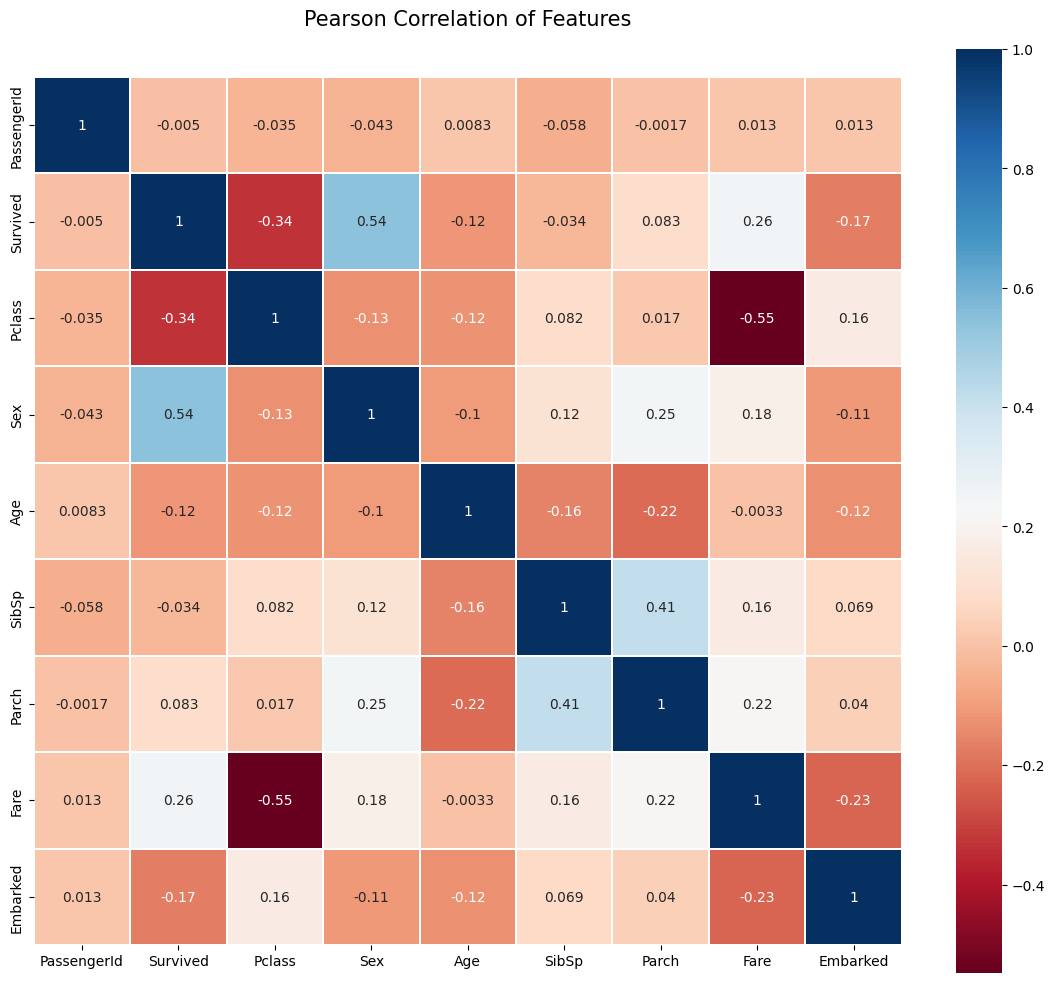

In [49]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

- Survived dan Pclass:
Terdapat korelasi negatif yang cukup kuat (-0.34) antara Pclass (kelas penumpang) dan Survived. Ini menunjukkan bahwa penumpang kelas yang lebih tinggi (Pclass lebih rendah) memiliki kemungkinan bertahan hidup yang lebih besar.

- Survived dan Fare:
Ada korelasi positif (0.26) antara Fare (biaya tiket) dan Survived. Ini mengindikasikan bahwa penumpang yang membayar tiket lebih mahal cenderung memiliki peluang bertahan hidup yang lebih tinggi.

- Pclass dan Fare:
Korelasi negatif yang kuat (-0.55) antara Pclass dan Fare menunjukkan bahwa kelas penumpang yang lebih tinggi (Pclass lebih rendah) membayar tarif yang lebih mahal.

- Age dan Pclass:
Terdapat korelasi negatif lemah (-0.12) antara Age dan Pclass, yang mungkin mengindikasikan bahwa penumpang yang lebih tua cenderung berada di kelas yang lebih tinggi.

- SibSp dan Parch:
Korelasi positif (0.41) antara SibSp (jumlah saudara/pasangan) dan Parch (jumlah orang tua/anak) menunjukkan bahwa penumpang yang bepergian dengan keluarga besar cenderung memiliki lebih banyak saudara dan anak.

- Sex dan Survived:
Meskipun tidak terlihat jelas dalam matriks, biasanya ada korelasi yang signifikan antara Sex dan Survived dalam dataset Titanic. Namun, informasi ini tidak terlihat dalam matriks yang diberikan.

- Age dan Survived:
Ada korelasi negatif lemah (-0.12) antara Age dan Survived, yang mungkin menunjukkan bahwa penumpang yang lebih muda memiliki sedikit keuntungan dalam hal kelangsungan hidup.

- Embarked dan Fare:
Ada korelasi positif lemah (0.22) antara Embarked (pelabuhan keberangkatan) dan Fare, yang mungkin menunjukkan bahwa tarif tiket bervariasi tergantung pada pelabuhan keberangkatan.

## Create ML models

In [66]:
X = df.drop(columns=['PassengerId', 'Survived'])
y = df['Survived']

In [67]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,3
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,3
3,1,1,35.0,1,0,53.1000,3
4,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...
884,2,0,27.0,0,0,13.0000,3
885,1,1,19.0,0,0,30.0000,3
886,3,1,60.0,1,2,23.4500,3
887,1,0,26.0,0,0,30.0000,1


In [68]:
y

0      0
1      1
2      1
3      1
4      0
      ..
884    0
885    1
886    0
887    1
888    0
Name: Survived, Length: 889, dtype: int64

In [71]:
# Fungsi untuk menyiapkan data
def prepare_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Fungsi untuk preprocessing data
def preprocess_data(df):
    le = LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
    return df

# Fungsi untuk mengevaluasi model
def evaluate_model(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)

    result = f"{name}:\nAccuracy: {accuracy:.2f}\n\n{report}\nConfusion Matrix:\n{cm}\n"
    return model, result  # Mengembalikan model juga

# Fungsi untuk melatih setiap model
def train_decision_tree(X_train, X_test, y_train, y_test):
    model = DecisionTreeClassifier()
    return evaluate_model(model, X_train, X_test, y_train, y_test, "Decision Tree")

def train_random_forest(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=100)
    return evaluate_model(model, X_train, X_test, y_train, y_test, "Random Forest")

def train_knn(X_train, X_test, y_train, y_test):
    model = KNeighborsClassifier(n_neighbors=5)
    return evaluate_model(model, X_train, X_test, y_train, y_test, "KNN")

def train_svm(X_train, X_test, y_train, y_test):
    model = SVC()
    return evaluate_model(model, X_train, X_test, y_train, y_test, "SVM")

def train_xgboost(X_train, X_test, y_train, y_test):
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    return evaluate_model(model, X_train, X_test, y_train, y_test, "XGBoost")

def train_logistic_regression(X_train, X_test, y_train, y_test):
    model = LogisticRegression(max_iter=200)
    return evaluate_model(model, X_train, X_test, y_train, y_test, "Logistic Regression")

# Fungsi untuk menjalankan semua model secara paralel
def run_all_models(X, y):
    X_train, X_test, y_train, y_test = prepare_data(X, y)

    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = {
            executor.submit(train_decision_tree, X_train, X_test, y_train, y_test): "Decision Tree",
            executor.submit(train_random_forest, X_train, X_test, y_train, y_test): "Random Forest",
            executor.submit(train_knn, X_train, X_test, y_train, y_test): "KNN",
            executor.submit(train_svm, X_train, X_test, y_train, y_test): "SVM",
            executor.submit(train_xgboost, X_train, X_test, y_train, y_test): "XGBoost",
            executor.submit(train_logistic_regression, X_train, X_test, y_train, y_test): "Logistic Regression",
        }

        models = {}
        for future in concurrent.futures.as_completed(futures):
            model_name = futures[future]
            try:
                model, result = future.result()
                print(result)
                models[model_name] = model  # Simpan model untuk prediksi nanti
            except Exception as e:
                print(f"{model_name} generated an exception: {e}")
    return models

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Not Survived', 'Survived'], 
                yticklabels=['Not Survived', 'Survived'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Fungsi untuk prediksi input kustom
def custom_input_predict(model, custom_data):
    input_df = pd.DataFrame([custom_data])
    
    # Melakukan prediksi dengan model
    prediction = model.predict(input_df)
    
    if prediction[0] == 0:
        print("Prediction: not survive(0)")
    else:
        print("Prediction: survived")

# # Contoh penggunaan
# df = pd.read_csv("dataset/SVMtrain.csv")  # Ganti dengan path dataset Anda
# df = preprocess_data(df)

# X = df.drop(columns=['PassangerId', 'Survived'])
# y = df['Survived']

models = run_all_models(X, y)

# input kustom
custom_data = {
    'Pclass': 3,
    'Sex': 1,  # 1 for male, 0 for female
    'Age': 28,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 7.25,
    'Embarked': 1  # 1 for Cherbourg, 2 for Queenstown, 3 for Southampton
}

# Melakukan prediksi menggunakan model SVM
custom_input_predict(models['KNN'], custom_data)


Decision Tree:
Accuracy: 0.72

              precision    recall  f1-score   support

           0       0.80      0.73      0.77       109
           1       0.63      0.71      0.67        69

    accuracy                           0.72       178
   macro avg       0.71      0.72      0.72       178
weighted avg       0.73      0.72      0.73       178

Confusion Matrix:
[[80 29]
 [20 49]]

SVM:
Accuracy: 0.69

              precision    recall  f1-score   support

           0       0.68      0.94      0.79       109
           1       0.75      0.30      0.43        69

    accuracy                           0.69       178
   macro avg       0.72      0.62      0.61       178
weighted avg       0.71      0.69      0.65       178

Confusion Matrix:
[[102   7]
 [ 48  21]]

Logistic Regression:
Accuracy: 0.79

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       109
           1       0.72      0.77      0.74        69

    accuracy 